In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Dropout, LSTM
from tensorflow.python.keras import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OrdinalEncoder
from pandas import DataFrame
from pandas import concat
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score

In [2]:
import os
import numpy as np
import pandas as pd
import more_itertools as mit
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
house_data = pd.read_csv("../preprocessed_data/clean_data1.csv")

In [4]:
house_data.head()

,hour_sin,hour_cos,month_sin,month_cos,day_sin,day_cos,Month,DayOfWeek,HourofDay,Day,...,T_stp_heat,Humidity,auxHeat1,fan,Thermostat_Temperature,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out
0,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,70.0,37.0,0.0,165.0,70.0,0.0,67.0,0.0,41.0,95.0
1,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,70.0,37.0,30.0,135.0,70.0,0.0,67.0,0.0,41.0,95.0
2,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,70.0,37.0,300.0,300.0,70.0,0.0,67.0,0.0,41.0,95.0
3,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,70.0,37.0,135.0,180.0,70.0,0.0,67.0,0.0,41.0,95.0
4,0.0,1.0,0.0,1.0,0.755303,0.484974,1,1,0,1,...,70.0,37.0,0.0,120.0,70.0,0.0,67.0,0.0,41.0,95.0


In [5]:
house_data.drop(labels = ['hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'Month', 'DayOfWeek', 'Day',
                          'HourofDay', 'HvacMode', 'Event', 'Schedule', 'Humidity', 'fan', 'Thermostat_Temperature', 
                          'Thermostat_Motion', 'Remote_Sensor_1_Temperature', 'Remote_Sensor_1_Motion'], axis = 1, inplace = True)

In [6]:
house_data.head()

,T_ctrl,T_stp_heat,auxHeat1,T_out,RH_out
0,70.0,70.0,0.0,41.0,95.0
1,70.0,70.0,30.0,41.0,95.0
2,70.0,70.0,300.0,41.0,95.0
3,70.0,70.0,135.0,41.0,95.0
4,70.0,70.0,0.0,41.0,95.0


In [7]:
house_data = house_data[['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out', 'auxHeat1']]

In [8]:
house_data.head()

,T_ctrl,T_stp_heat,T_out,RH_out,auxHeat1
0,70.0,70.0,41.0,95.0,0.0
1,70.0,70.0,41.0,95.0,30.0
2,70.0,70.0,41.0,95.0,300.0
3,70.0,70.0,41.0,95.0,135.0
4,70.0,70.0,41.0,95.0,0.0


[Text(0, 0.5, 'Percentage Values'), Text(0.5, 0, 'Target Variable Values')]

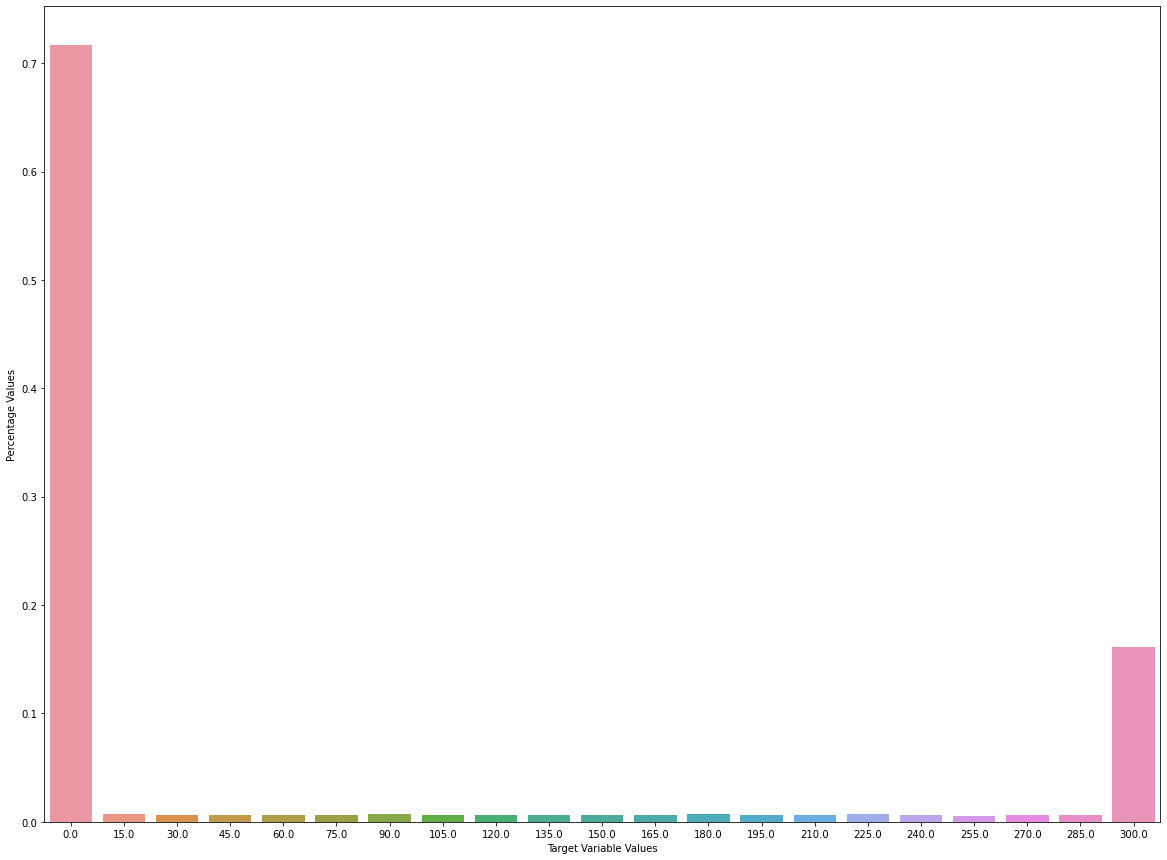

In [9]:
plt.figure(figsize = (20, 15))
ax = sns.barplot(x = house_data.auxHeat1.value_counts().index, y = house_data.auxHeat1.value_counts(normalize = True).values)
ax.set(xlabel = 'Target Variable Values', ylabel = 'Percentage Values')

[Text(0.5, 0, 'Target Variable Values')]

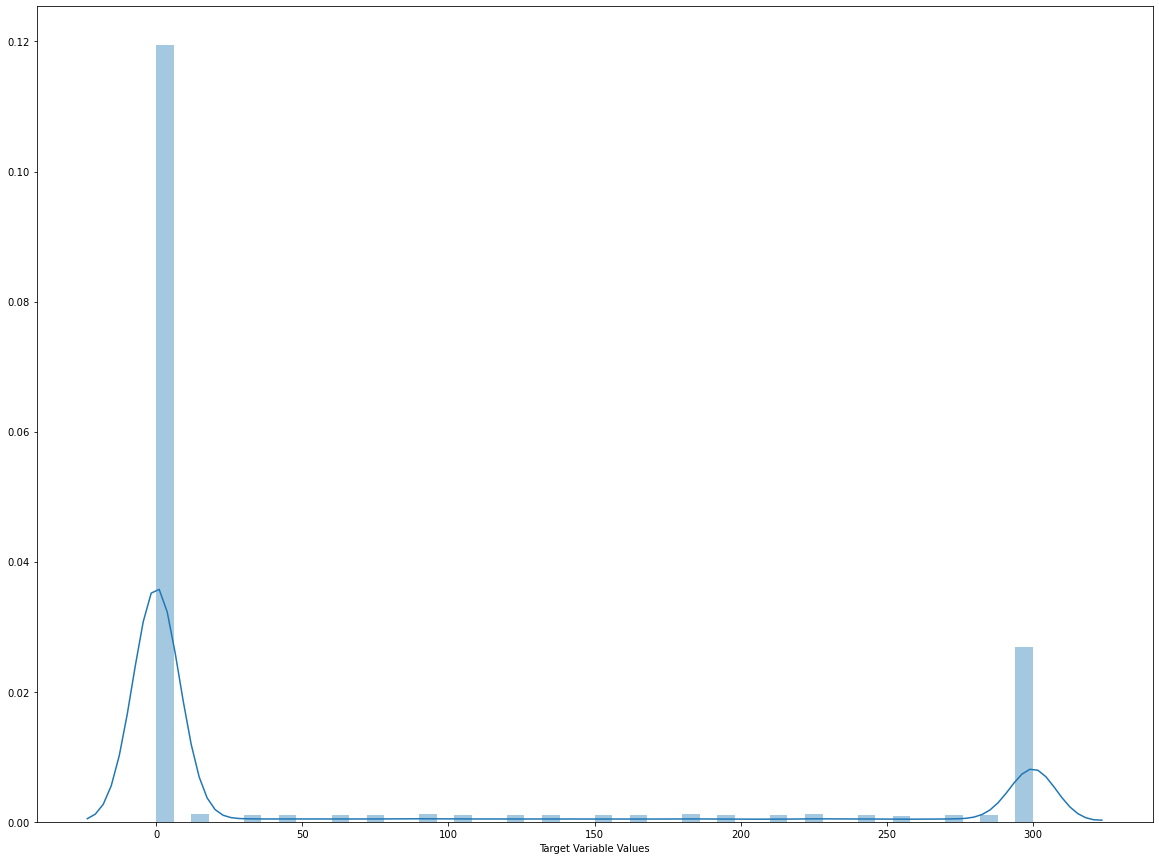

In [10]:
plt.figure(figsize = (20, 15))
ax = sns.distplot(house_data.auxHeat1)
ax.set(xlabel = 'Target Variable Values')

In [11]:
start, end = 0, len(house_data)

cur = 0
ls = list()
step = 12
while start <= end - 12:
    cur = start + step
    print(cur)
    
    ls.append(list(range(start, cur)))
    
    start = cur

12
24
36
48
60
72
84
96
108
120
132
144
156
168
180
192
204
216
228
240
252
264
276
288
300
312
324
336
348
360
372
384
396
408
420
432
444
456
468
480
492
504
516
528
540
552
564
576
588
600
612
624
636
648
660
672
684
696
708
720
732
744
756
768
780
792
804
816
828
840
852
864
876
888
900
912
924
936
948
960
972
984
996
1008
1020
1032
1044
1056
1068
1080
1092
1104
1116
1128
1140
1152
1164
1176
1188
1200
1212
1224
1236
1248
1260
1272
1284
1296
1308
1320
1332
1344
1356
1368
1380
1392
1404
1416
1428
1440
1452
1464
1476
1488
1500
1512
1524
1536
1548
1560
1572
1584
1596
1608
1620
1632
1644
1656
1668
1680
1692
1704
1716
1728
1740
1752
1764
1776
1788
1800
1812
1824
1836
1848
1860
1872
1884
1896
1908
1920
1932
1944
1956
1968
1980
1992
2004
2016
2028
2040
2052
2064
2076
2088
2100
2112
2124
2136
2148
2160
2172
2184
2196
2208
2220
2232
2244
2256
2268
2280
2292
2304
2316
2328
2340
2352
2364
2376
2388
2400
2412
2424
2436
2448
2460
2472
2484
2496
2508
2520
2532
2544
2556
2568
2580
2592
2604
2616
2

18744
18756
18768
18780
18792
18804
18816
18828
18840
18852
18864
18876
18888
18900
18912
18924
18936
18948
18960
18972
18984
18996
19008
19020
19032
19044
19056
19068
19080
19092
19104
19116
19128
19140
19152
19164
19176
19188
19200
19212
19224
19236
19248
19260
19272
19284
19296
19308
19320
19332
19344
19356
19368
19380
19392
19404
19416
19428
19440
19452
19464
19476
19488
19500
19512
19524
19536
19548
19560
19572
19584
19596
19608
19620
19632
19644
19656
19668
19680
19692
19704
19716
19728
19740
19752
19764
19776
19788
19800
19812
19824
19836
19848
19860
19872
19884
19896
19908
19920
19932
19944
19956
19968
19980
19992
20004
20016
20028
20040
20052
20064
20076
20088
20100
20112
20124
20136
20148
20160
20172
20184
20196
20208
20220
20232
20244
20256
20268
20280
20292
20304
20316
20328
20340
20352
20364
20376
20388
20400
20412
20424
20436
20448
20460
20472
20484
20496
20508
20520
20532
20544
20556
20568
20580
20592
20604
20616
20628
20640
20652
20664
20676
20688
20700
20712
20724
2073

43800
43812
43824
43836
43848
43860
43872
43884
43896
43908
43920
43932
43944
43956
43968
43980
43992
44004
44016
44028
44040
44052
44064
44076
44088
44100
44112
44124
44136
44148
44160
44172
44184
44196
44208
44220
44232
44244
44256
44268
44280
44292
44304
44316
44328
44340
44352
44364
44376
44388
44400
44412
44424
44436
44448
44460
44472
44484
44496
44508
44520
44532
44544
44556
44568
44580
44592
44604
44616
44628
44640
44652
44664
44676
44688
44700
44712
44724
44736
44748
44760
44772
44784
44796
44808
44820
44832
44844
44856
44868
44880
44892
44904
44916
44928
44940
44952
44964
44976
44988
45000
45012
45024
45036
45048
45060
45072
45084
45096
45108
45120
45132
45144
45156
45168
45180
45192
45204
45216
45228
45240
45252
45264
45276
45288
45300
45312
45324
45336
45348
45360
45372
45384
45396
45408
45420
45432
45444
45456
45468
45480
45492
45504
45516
45528
45540
45552
45564
45576
45588
45600
45612
45624
45636
45648
45660
45672
45684
45696
45708
45720
45732
45744
45756
45768
45780
4579

In [12]:
df1 = pd.DataFrame({"T_ctrl": [], 
                    "T_stp_heat": [], 
                    "T_out" : [], 
                    "RH_out" : [],
                    "auxHeat1" : []})

In [13]:
df2 = pd.DataFrame({"T_ctrl": [], 
                    "T_stp_heat": [], 
                    "T_out" : [], 
                    "RH_out" : [],
                    "auxHeat1" : []})

In [14]:
for i in ls:
    dummy, n = pd.DataFrame(house_data.iloc[i].sum()).T, len(i)
    print(n)
    dummy[['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out']] = dummy[['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out']] / n
    df2 = df2.append(dummy, ignore_index = True)

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
1

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
1

In [15]:
house_df = df2.copy()

[Text(0.5, 0, 'Target Variable Values')]

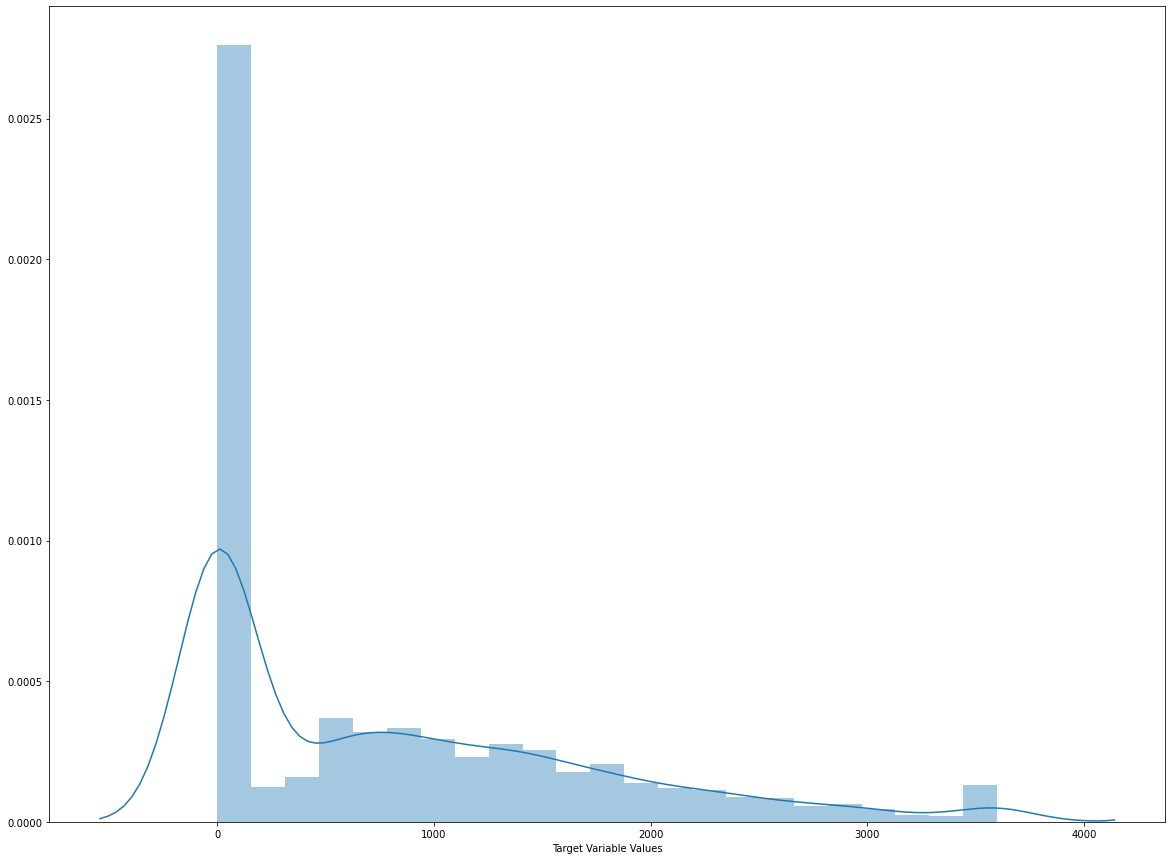

In [16]:
plt.figure(figsize = (20, 15))
ax = sns.distplot(house_df.auxHeat1)
ax.set(xlabel = 'Target Variable Values')

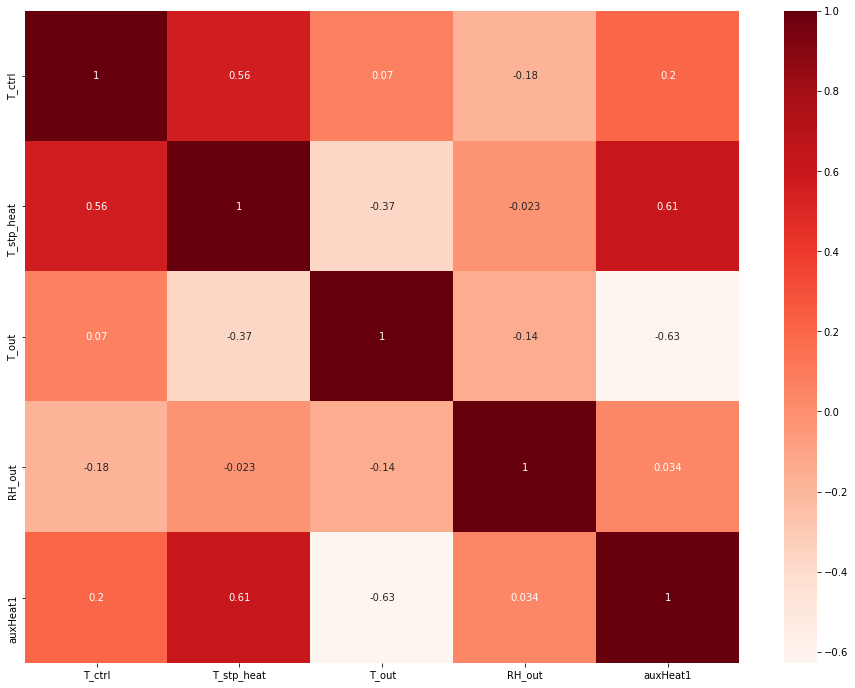

In [17]:
plt.figure(figsize = (16,12))
cor = house_df.corr('pearson')
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [18]:
Q1 = house_df.auxHeat1.quantile(0.25)
Q3 = house_df.auxHeat1.quantile(0.75)
IQR = Q3 - Q1

In [19]:
((house_df.auxHeat1 < (Q1 - 1.5 * IQR)) | (house_df.auxHeat1 > (Q3 + 1.5 * IQR))).sum()

105

In [20]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(house_df))
print(z)

[[0.31592343 0.67555905 0.04209645 1.86445299 0.17421222]
 [0.31592343 0.67555905 0.07508157 1.75968822 0.28669082]
 [0.31592343 0.67555905 0.04209645 1.65492345 0.83301545]
 ...
 [0.31592343 0.67555905 0.77703409 0.52579203 0.07780199]
 [0.31592343 0.67555905 0.72755641 0.29298143 0.14207547]
 [0.31592343 0.67555905 0.65059112 0.07951553 0.09387036]]


In [21]:
threshold = 3
print(np.where(z > 3))

(array([  95,  123,  176,  227,  295,  296,  297,  343,  352,  368,  369,
        370,  371,  372,  373,  374,  375,  376,  380,  387,  390,  453,
        454,  457,  478,  496,  511,  513,  541,  542,  543,  545,  546,
        547,  547,  548,  548,  549,  549,  561,  562,  563,  570,  571,
        572,  586,  626,  725,  740,  768,  769,  770,  791,  810,  829,
        930,  931, 1055, 1056, 1200, 1415, 1573, 1574, 1675, 1688, 1704,
       1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801,
       1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812,
       1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823,
       1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834,
       1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1852,
       1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863,
       1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874,
       1875, 1876, 1877, 1878, 1879, 1880, 1881, 1

In [22]:
Q1 = house_df.quantile(0.25)
Q3 = house_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

T_ctrl           2.916667
T_stp_heat       7.333333
T_out           20.750000
RH_out          21.166667
auxHeat1      1357.500000
dtype: float64


In [23]:
house_df_out = house_df[~((house_df < (Q1 - 1.5 * IQR)) | (house_df > (Q3 + 1.5 * IQR))).any(axis = 1)]
house_df_out.shape

(4571, 5)

In [24]:
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from neupy import algorithms

[Text(0.5, 0, 'Target Variable Values')]

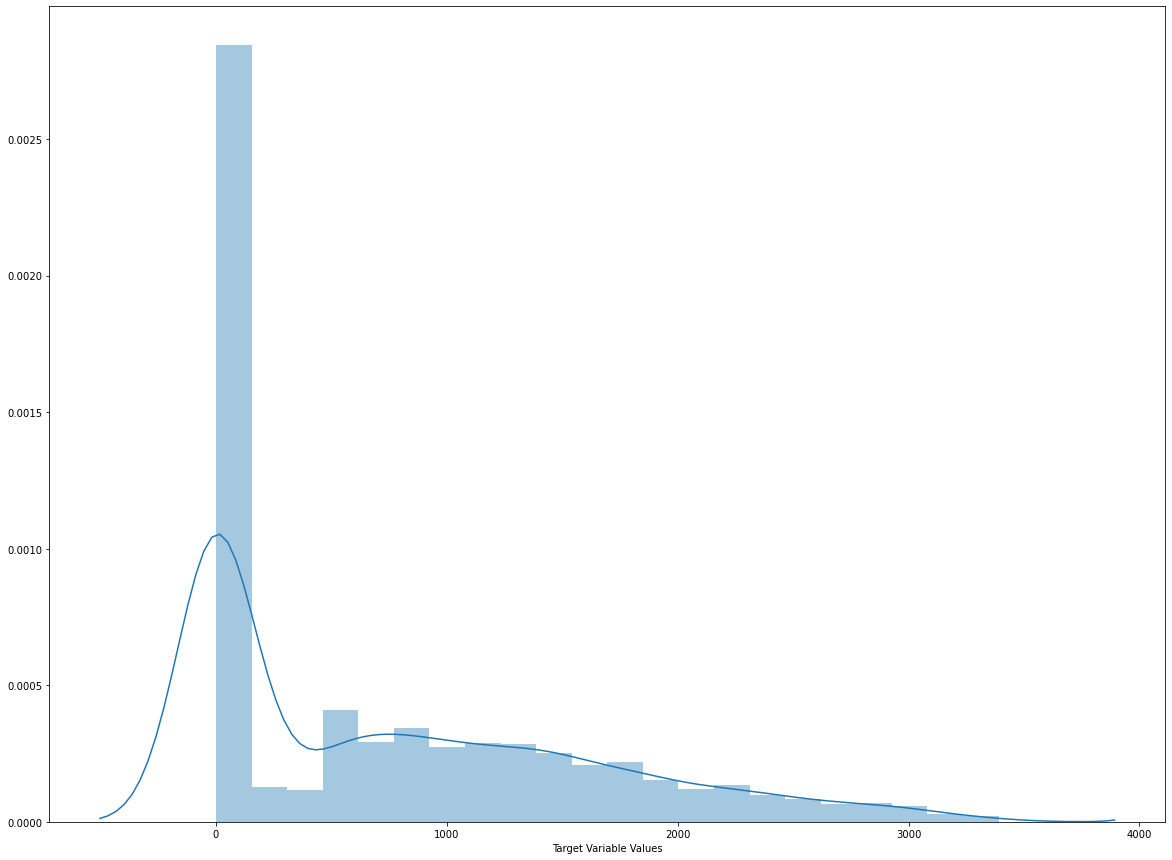

In [25]:
plt.figure(figsize = (20, 15))
ax = sns.distplot(house_df_out.auxHeat1)
ax.set(xlabel = 'Target Variable Values')

In [26]:
house_df_out

,T_ctrl,T_stp_heat,T_out,RH_out,auxHeat1
0,70.0,70.0,41.500000,95.500000,960.0
1,70.0,70.0,42.000000,94.000000,1065.0
2,70.0,70.0,41.500000,92.500000,1575.0
3,70.0,70.0,38.500000,89.500000,1440.0
4,70.0,70.0,33.000000,75.000000,1800.0
...,...,...,...,...,...
4898,70.0,70.0,31.166667,76.166667,0.0
4899,70.0,70.0,30.083333,78.750000,0.0
4900,70.0,70.0,29.083333,76.333333,870.0
4901,70.0,70.0,29.833333,73.000000,930.0


In [27]:
house_df_out['auxHeat1'].value_counts()

0.0       1937
540.0       44
570.0       30
510.0       30
525.0       29
          ... 
150.0        1
3195.0       1
2460.0       1
3300.0       1
3210.0       1
Name: auxHeat1, Length: 223, dtype: int64

In [28]:
daily_activity_member = house_df_out[['T_out', 'RH_out', 'auxHeat1']].groupby(by = ['T_out', 'RH_out']).count()['auxHeat1'].unstack()

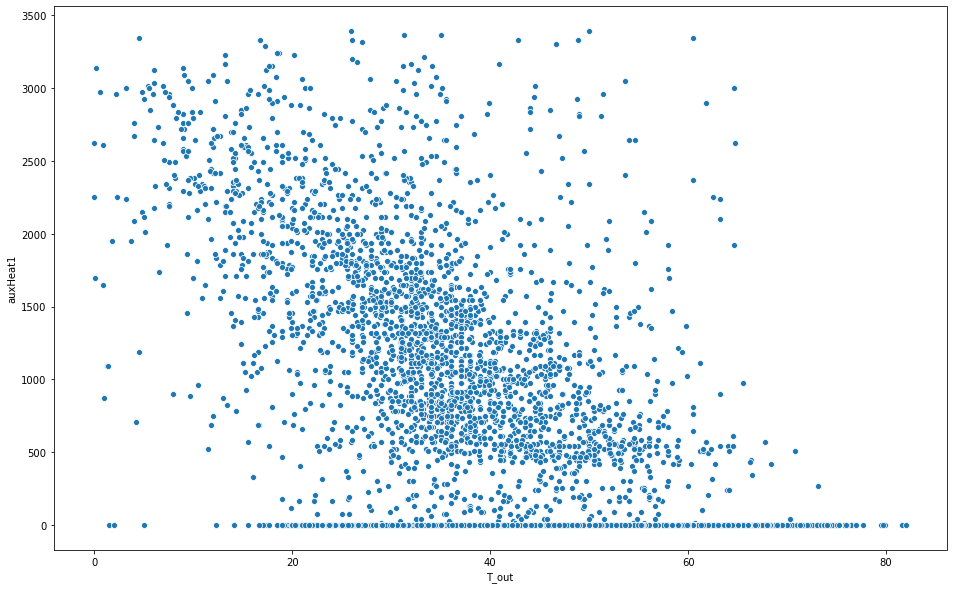

In [29]:
plt.figure(figsize = (16, 10))
sns.scatterplot(x = house_df_out['T_out'], y = house_df_out['auxHeat1'])

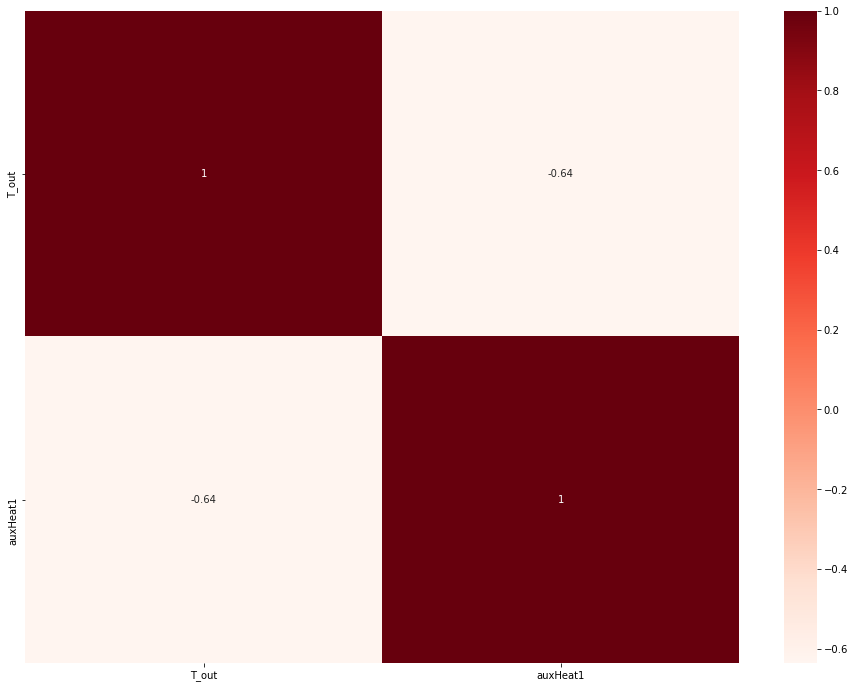

In [30]:
plt.figure(figsize = (16,12))
cor = house_df_out[['T_out', 'auxHeat1']].corr('pearson')
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

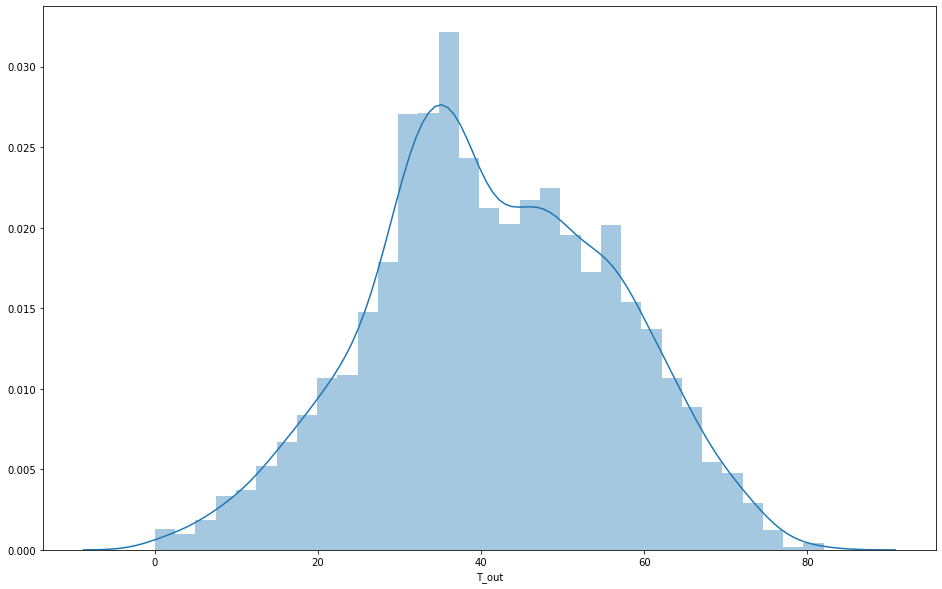

In [31]:
plt.figure(figsize = (16, 10))
sns.distplot(house_df_out['T_out'])

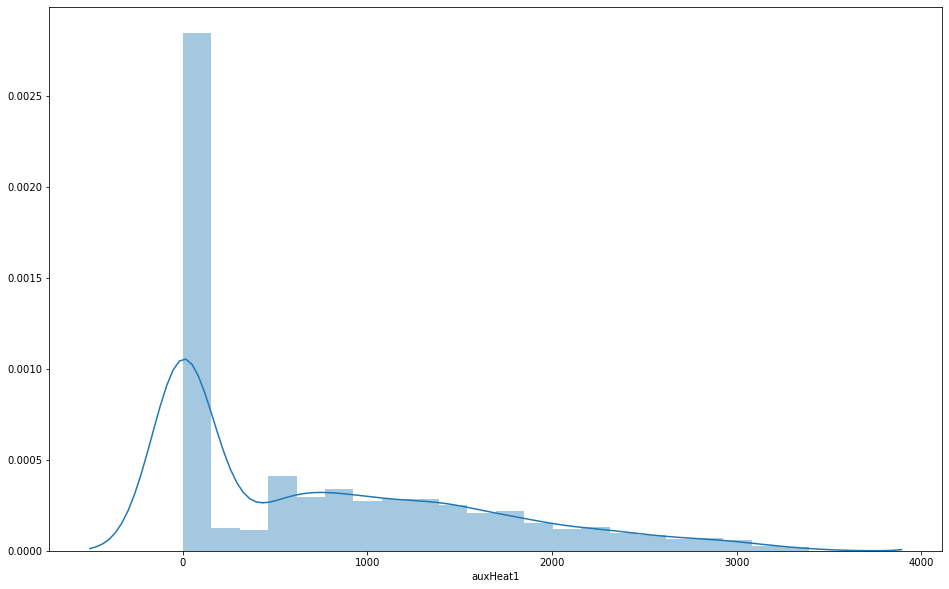

In [32]:
plt.figure(figsize = (16, 10))
sns.distplot(house_df_out['auxHeat1'])

In [33]:
house_df_out.head()

,T_ctrl,T_stp_heat,T_out,RH_out,auxHeat1
0,70.0,70.0,41.5,95.5,960.0
1,70.0,70.0,42.0,94.0,1065.0
2,70.0,70.0,41.5,92.5,1575.0
3,70.0,70.0,38.5,89.5,1440.0
4,70.0,70.0,33.0,75.0,1800.0


In [34]:
def f(row):
    val = row['T_ctrl'] - row['T_out']
    return val

In [36]:
house_df_out['T_ctrl - T_out'] = house_df_out.apply(f, axis = 1)

In [37]:
house_df_out.head()

,T_ctrl,T_stp_heat,T_out,RH_out,auxHeat1,T_ctrl - T_out
0,70.0,70.0,41.5,95.5,960.0,28.5
1,70.0,70.0,42.0,94.0,1065.0,28.0
2,70.0,70.0,41.5,92.5,1575.0,28.5
3,70.0,70.0,38.5,89.5,1440.0,31.5
4,70.0,70.0,33.0,75.0,1800.0,37.0


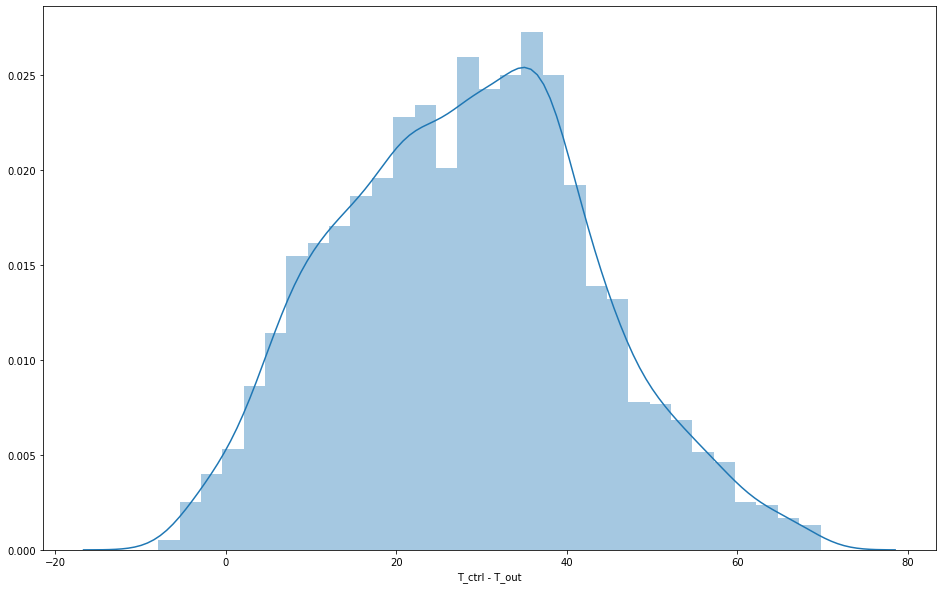

In [38]:
plt.figure(figsize = (16, 10))
sns.distplot(house_df_out['T_ctrl - T_out'])

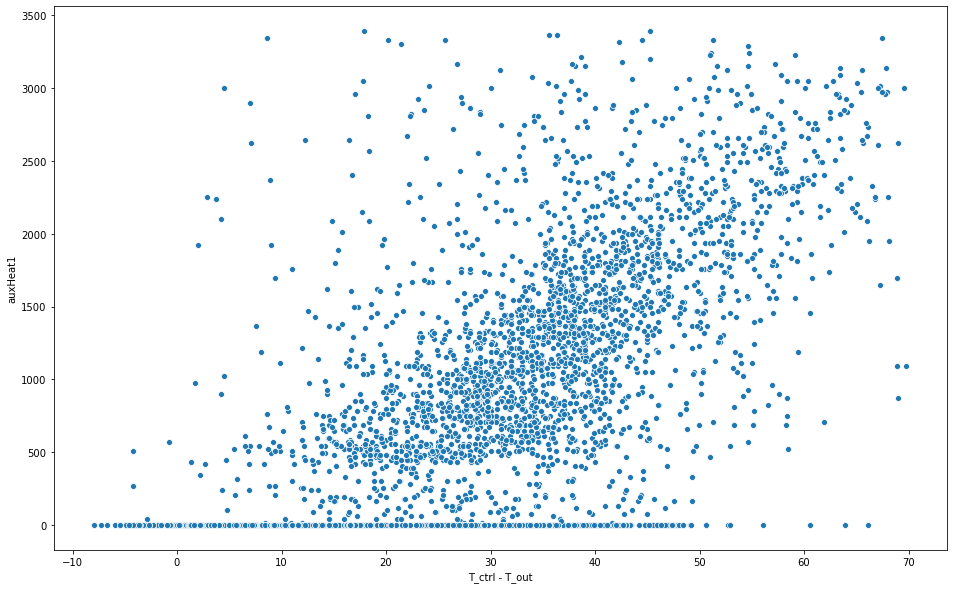

In [39]:
plt.figure(figsize = (16, 10))
sns.scatterplot(x = house_df_out['T_ctrl - T_out'], y = house_df_out['auxHeat1'])

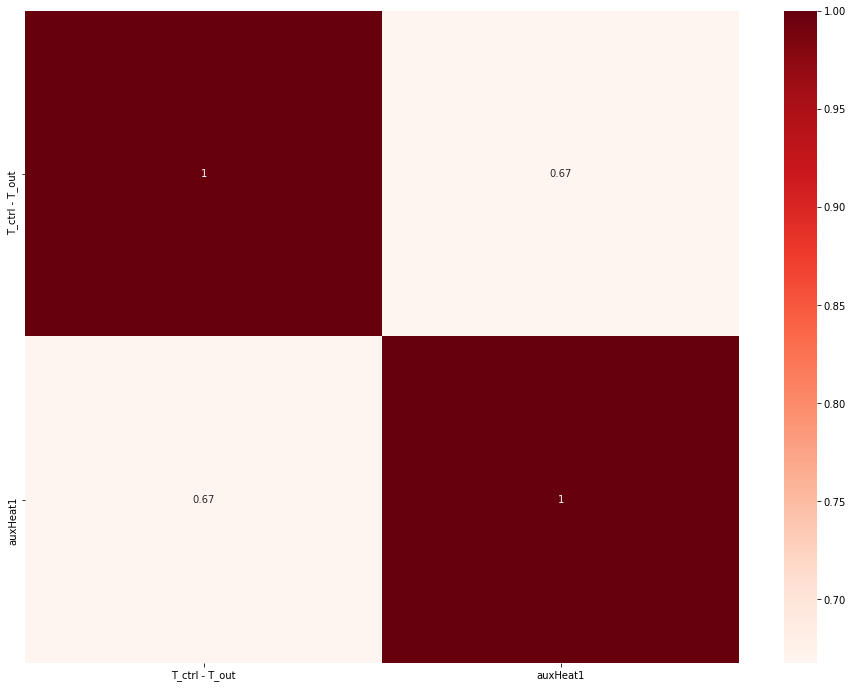

In [40]:
plt.figure(figsize = (16,12))
cor = house_df_out[['T_ctrl - T_out', 'auxHeat1']].corr('pearson')
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [41]:
house_df_out = house_df_out[house_df_out['auxHeat1'] != 0.0]

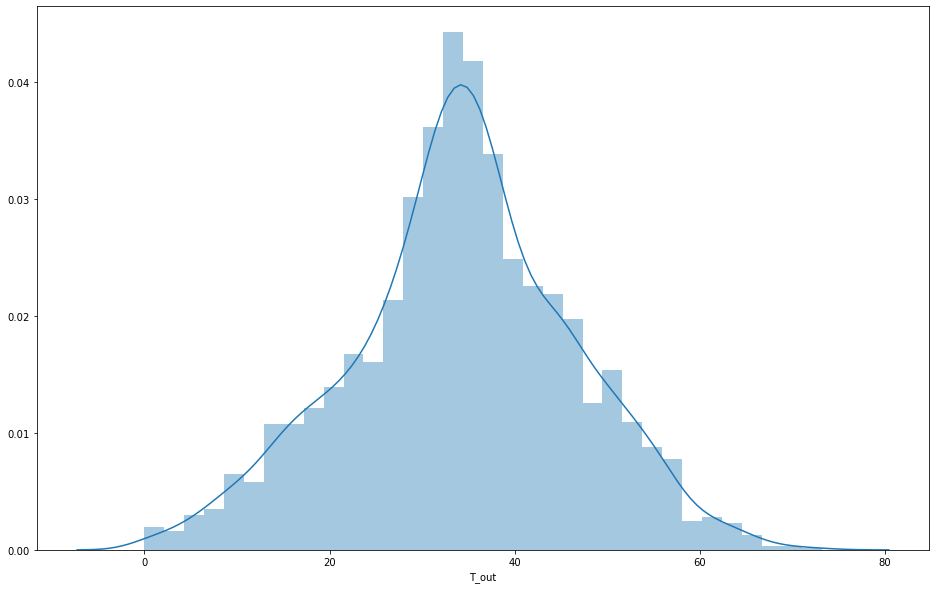

In [42]:
plt.figure(figsize = (16, 10))
sns.distplot(house_df_out['T_out'])

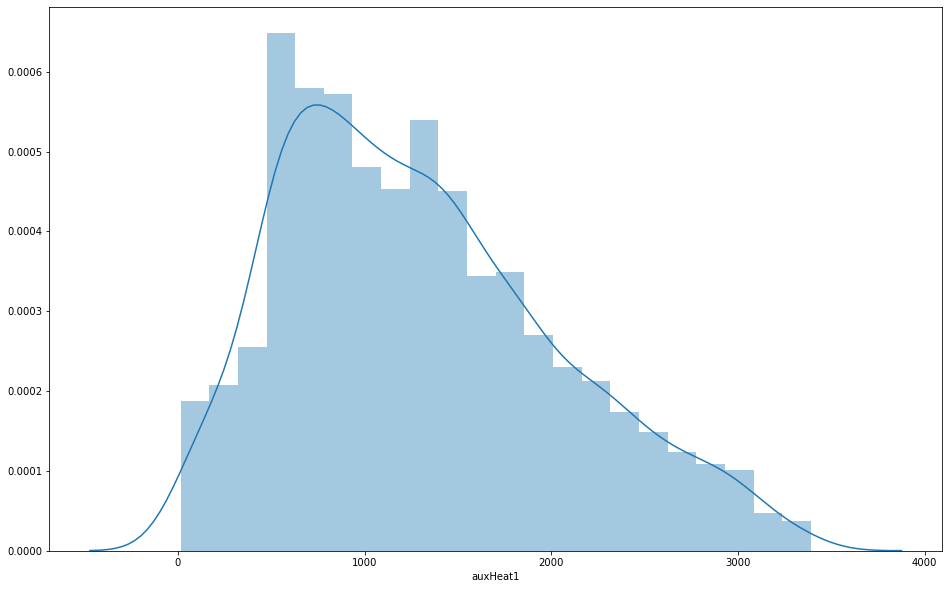

In [43]:
plt.figure(figsize = (16, 10))
sns.distplot(house_df_out['auxHeat1'])

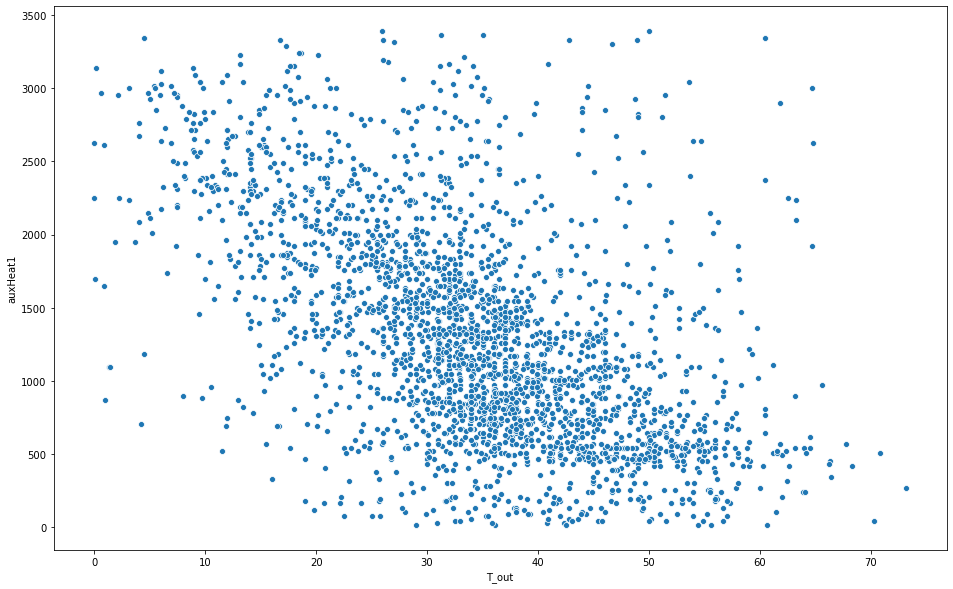

In [44]:
plt.figure(figsize = (16, 10))
sns.scatterplot(x = house_df_out['T_out'], y = house_df_out['auxHeat1'])

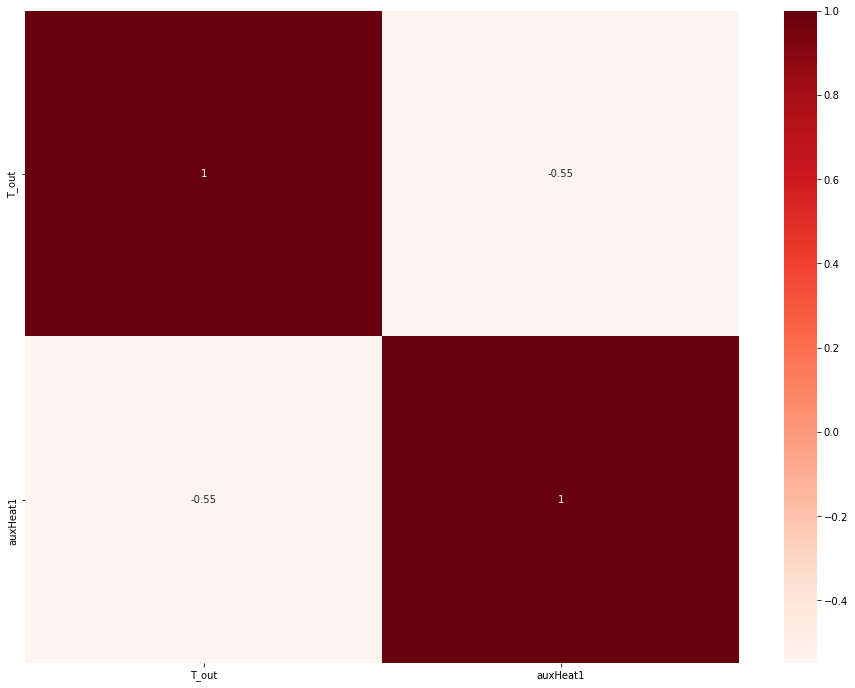

In [45]:
plt.figure(figsize = (16,12))
cor = house_df_out[['T_out', 'auxHeat1']].corr('pearson')
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

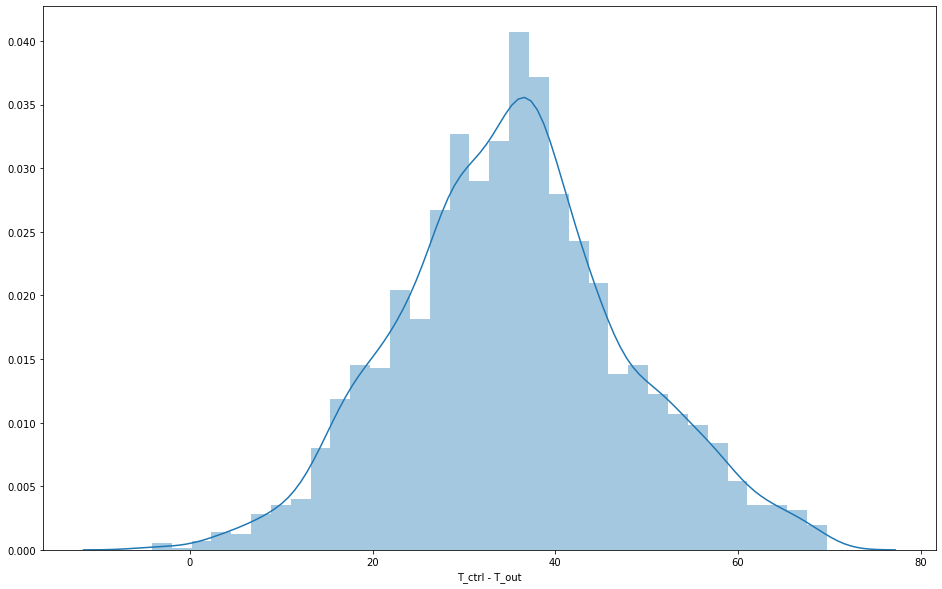

In [46]:
plt.figure(figsize = (16, 10))
sns.distplot(house_df_out['T_ctrl - T_out'])

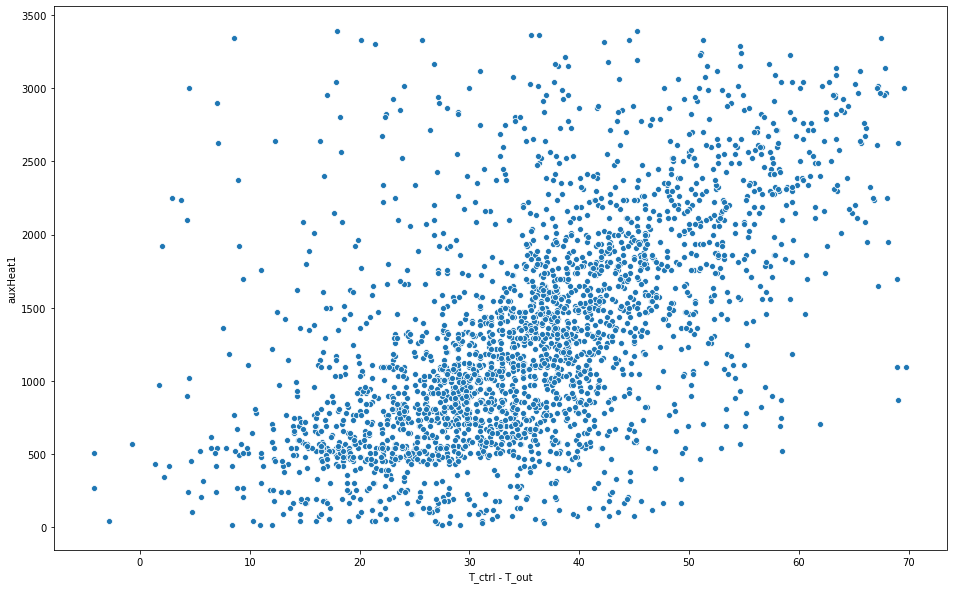

In [47]:
plt.figure(figsize = (16, 10))
sns.scatterplot(x = house_df_out['T_ctrl - T_out'], y = house_df_out['auxHeat1'])

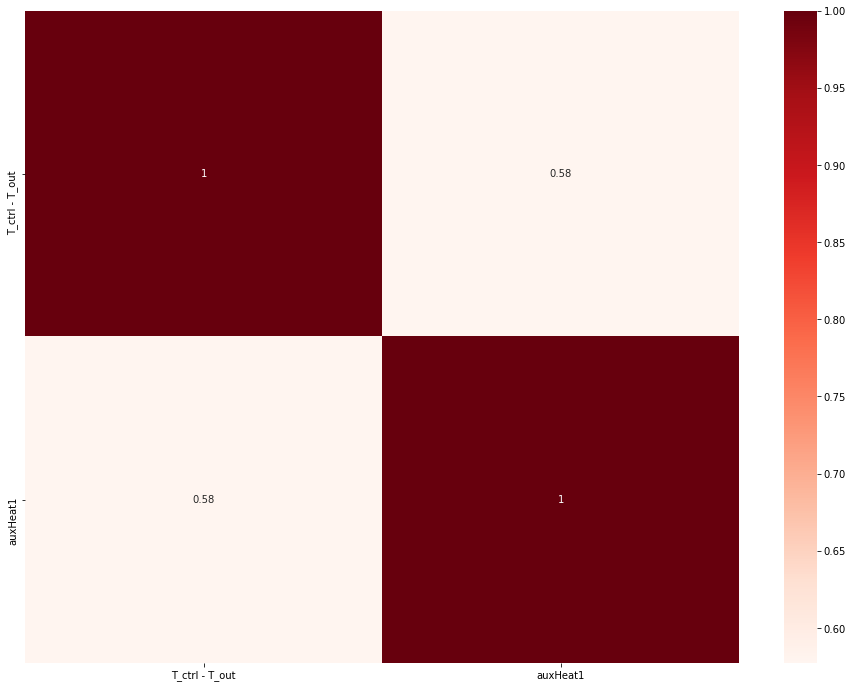

In [48]:
plt.figure(figsize = (16,12))
cor = house_df_out[['T_ctrl - T_out', 'auxHeat1']].corr('pearson')
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

# Daily

In [49]:
house_data = pd.read_csv("../preprocessed_data/clean_data1.csv")

In [50]:
house_data.drop(labels = ['hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'day_sin', 'day_cos', 'Month', 'DayOfWeek', 'Day',
                          'HourofDay', 'HvacMode', 'Event', 'Schedule', 'Humidity', 'fan', 'Thermostat_Temperature', 
                          'Thermostat_Motion', 'Remote_Sensor_1_Temperature', 'Remote_Sensor_1_Motion'], axis = 1, inplace = True)

In [51]:
house_data = house_data[['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out', 'auxHeat1']]

[Text(0, 0.5, 'Percentage Values'), Text(0.5, 0, 'Target Variable Values')]

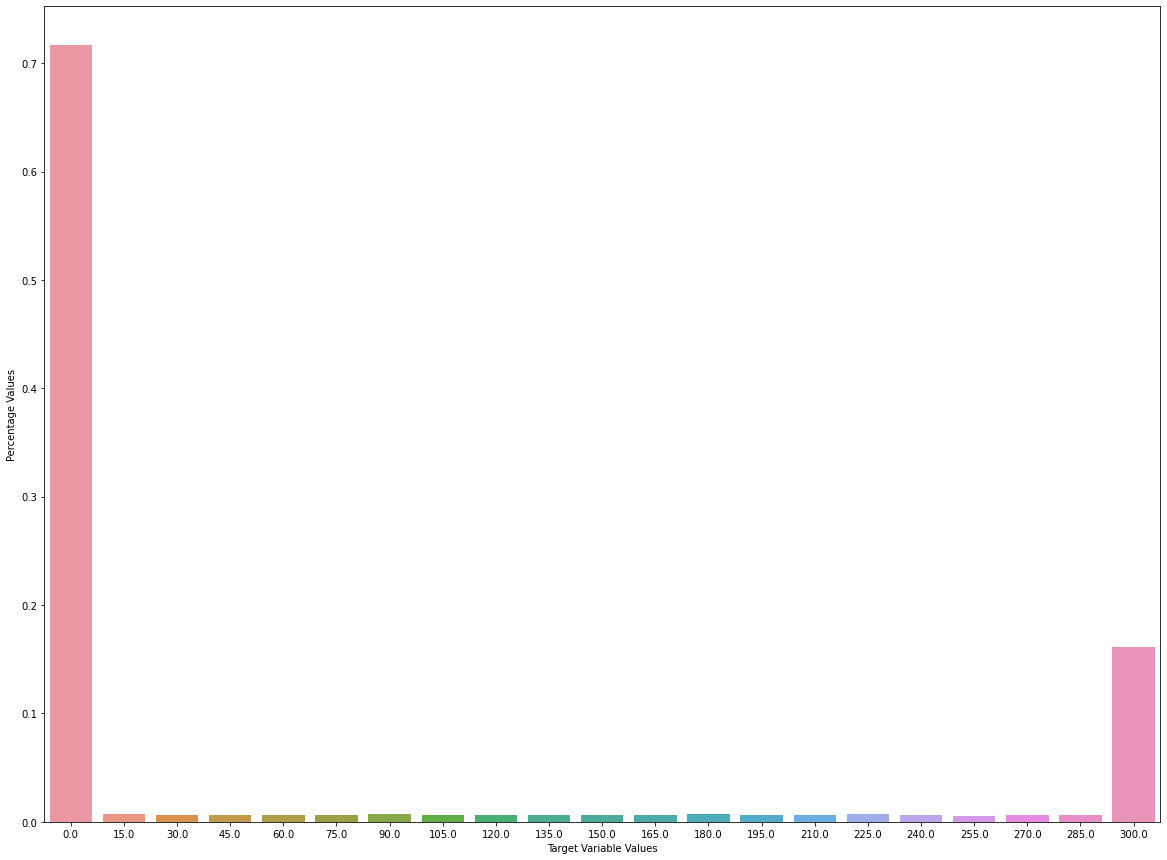

In [52]:
plt.figure(figsize = (20, 15))
ax = sns.barplot(x = house_data.auxHeat1.value_counts().index, y = house_data.auxHeat1.value_counts(normalize = True).values)
ax.set(xlabel = 'Target Variable Values', ylabel = 'Percentage Values')

[Text(0.5, 0, 'Target Variable Values')]

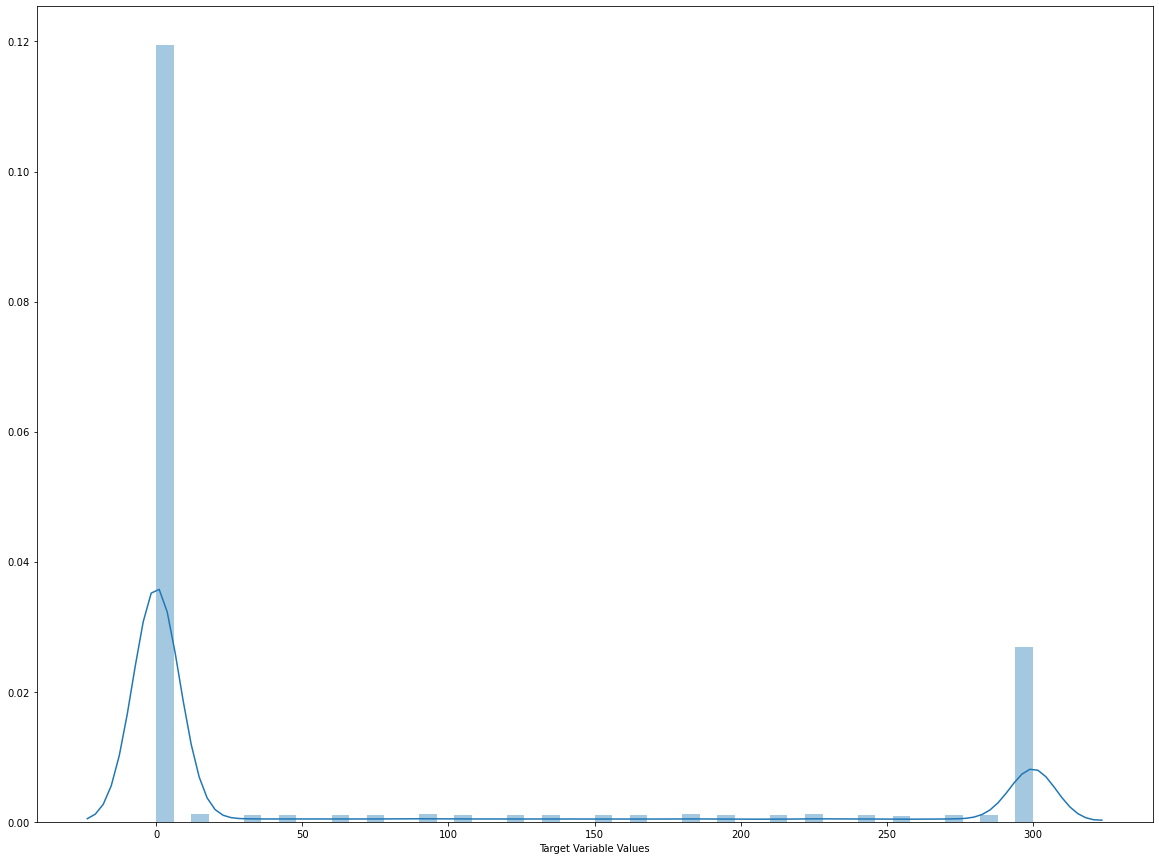

In [53]:
plt.figure(figsize = (20, 15))
ax = sns.distplot(house_data.auxHeat1)
ax.set(xlabel = 'Target Variable Values')

In [54]:
start, end = 0, len(house_data)

cur = 0
ls = list()
step = 288
while start <= end - 288:
    cur = start + step
    print(cur)
    
    ls.append(list(range(start, cur)))
    
    start = cur

288
576
864
1152
1440
1728
2016
2304
2592
2880
3168
3456
3744
4032
4320
4608
4896
5184
5472
5760
6048
6336
6624
6912
7200
7488
7776
8064
8352
8640
8928
9216
9504
9792
10080
10368
10656
10944
11232
11520
11808
12096
12384
12672
12960
13248
13536
13824
14112
14400
14688
14976
15264
15552
15840
16128
16416
16704
16992
17280
17568
17856
18144
18432
18720
19008
19296
19584
19872
20160
20448
20736
21024
21312
21600
21888
22176
22464
22752
23040
23328
23616
23904
24192
24480
24768
25056
25344
25632
25920
26208
26496
26784
27072
27360
27648
27936
28224
28512
28800
29088
29376
29664
29952
30240
30528
30816
31104
31392
31680
31968
32256
32544
32832
33120
33408
33696
33984
34272
34560
34848
35136
35424
35712
36000
36288
36576
36864
37152
37440
37728
38016
38304
38592
38880
39168
39456
39744
40032
40320
40608
40896
41184
41472
41760
42048
42336
42624
42912
43200
43488
43776
44064
44352
44640
44928
45216
45504
45792
46080
46368
46656
46944
47232
47520
47808
48096
48384
48672
48960
49248
49536
49824

In [55]:
df1 = pd.DataFrame({"T_ctrl": [], 
                    "T_stp_heat": [], 
                    "T_out" : [], 
                    "RH_out" : [],
                    "auxHeat1" : []})

df2 = pd.DataFrame({"T_ctrl": [], 
                    "T_stp_heat": [], 
                    "T_out" : [], 
                    "RH_out" : [],
                    "auxHeat1" : []})

In [56]:
for i in ls:
    dummy, n = pd.DataFrame(house_data.iloc[i].sum()).T, len(i)
    print(n)
    dummy[['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out']] = dummy[['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out']] / n
    df2 = df2.append(dummy, ignore_index = True)

288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288
288


In [57]:
house_df = df2.copy()

[Text(0.5, 0, 'Target Variable Values')]

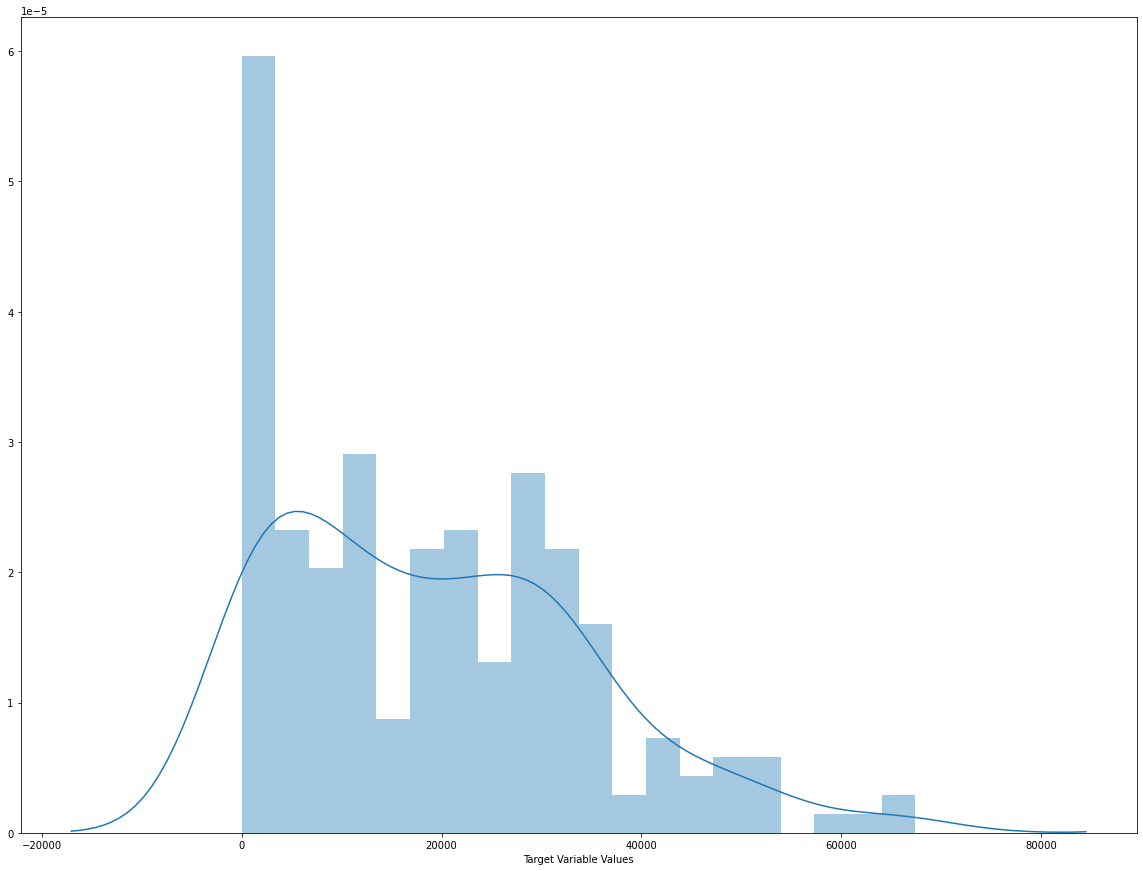

In [58]:
plt.figure(figsize = (20, 15))
ax = sns.distplot(house_df.auxHeat1, bins = 20)
ax.set(xlabel = 'Target Variable Values')

In [59]:
house_df.shape

(204, 5)

In [60]:
Q1 = house_df.quantile(0.25)
Q3 = house_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

T_ctrl            2.013021
T_stp_heat        5.282986
T_out            20.686632
RH_out           15.207465
auxHeat1      23553.750000
dtype: float64


In [61]:
house_df_out = house_df[~((house_df < (Q1 - 1.5 * IQR)) | (house_df > (Q3 + 1.5 * IQR))).any(axis = 1)]
house_df_out.shape

(186, 5)

[Text(0.5, 0, 'Target Variable Values')]

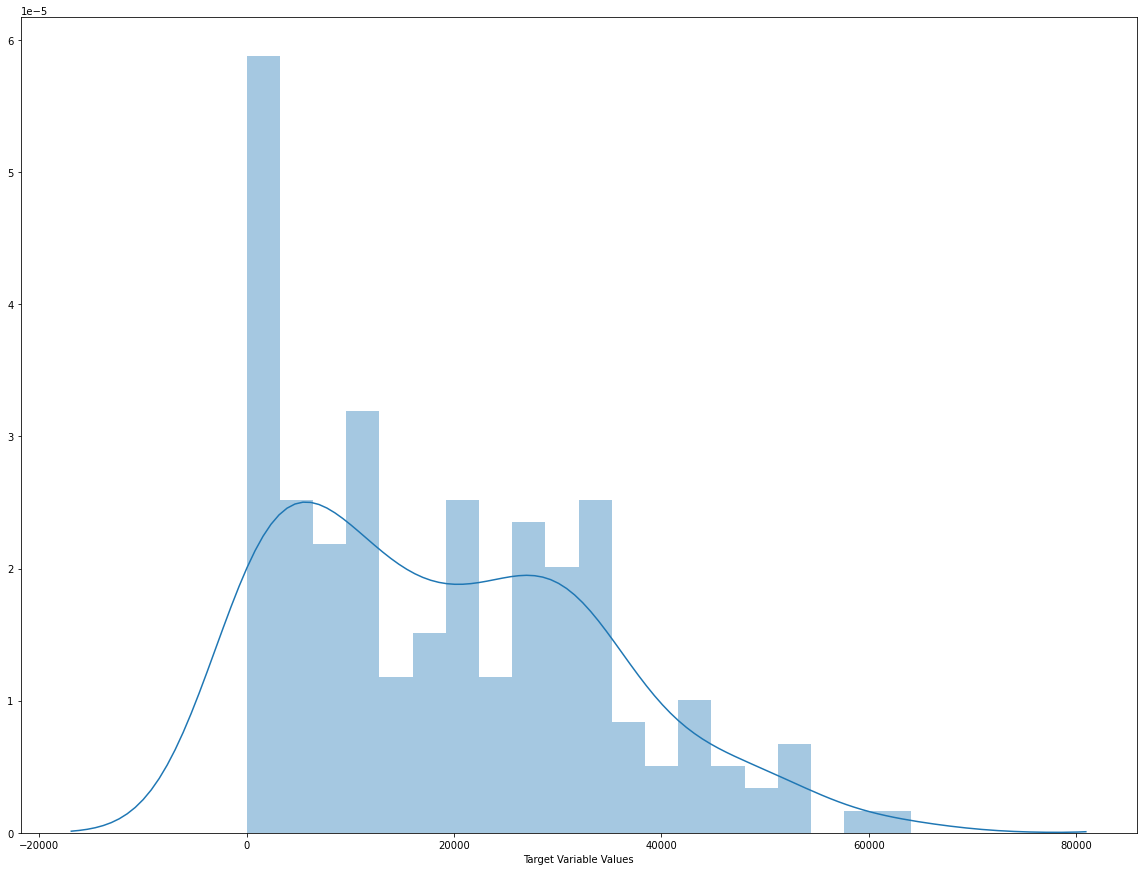

In [62]:
plt.figure(figsize = (20, 15))
ax = sns.distplot(house_df_out.auxHeat1, bins = 20)
ax.set(xlabel = 'Target Variable Values')

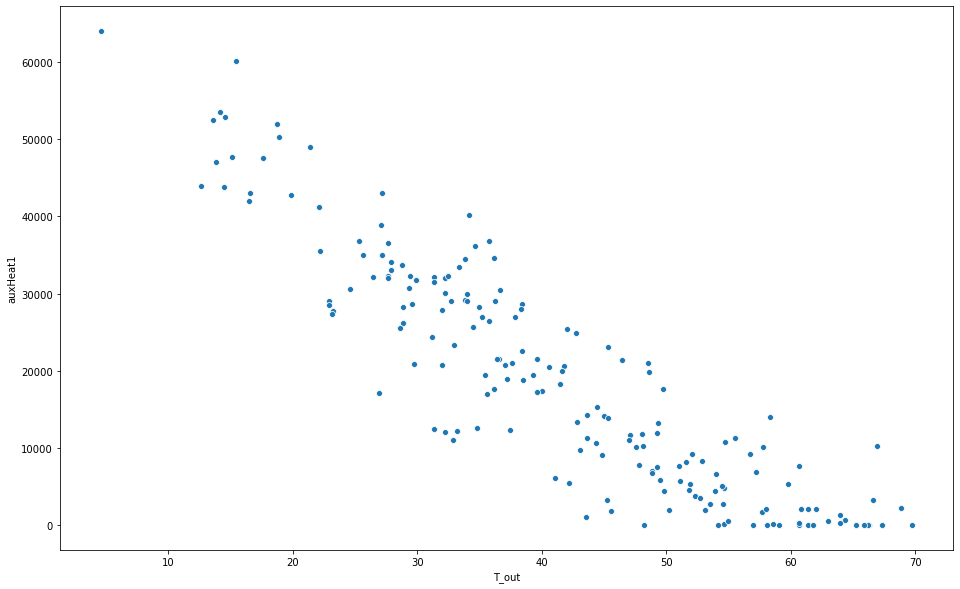

In [63]:
plt.figure(figsize = (16, 10))
sns.scatterplot(x = house_df_out['T_out'], y = house_df_out['auxHeat1'])

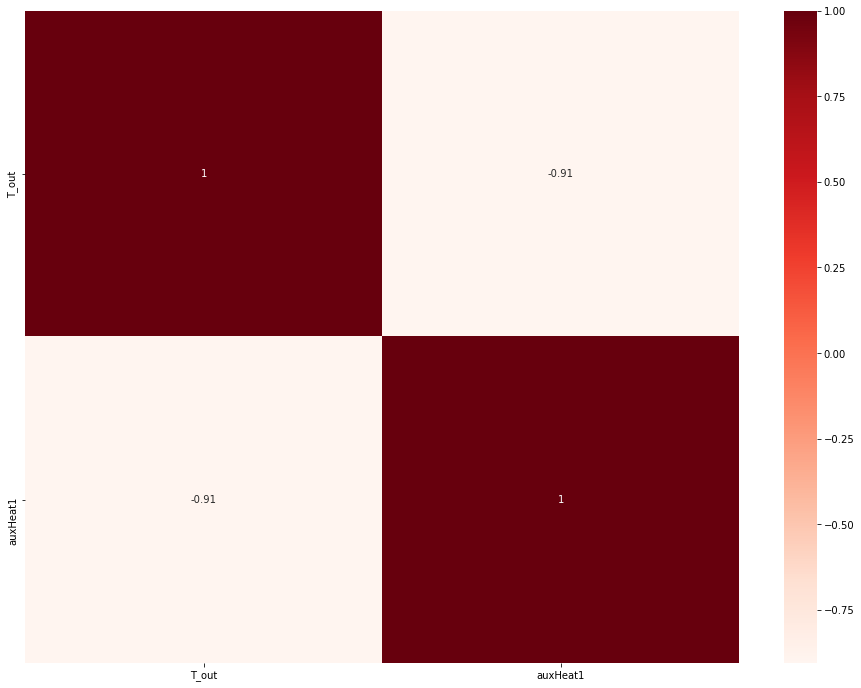

In [64]:
plt.figure(figsize = (16,12))
cor = house_df_out[['T_out', 'auxHeat1']].corr('pearson')
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

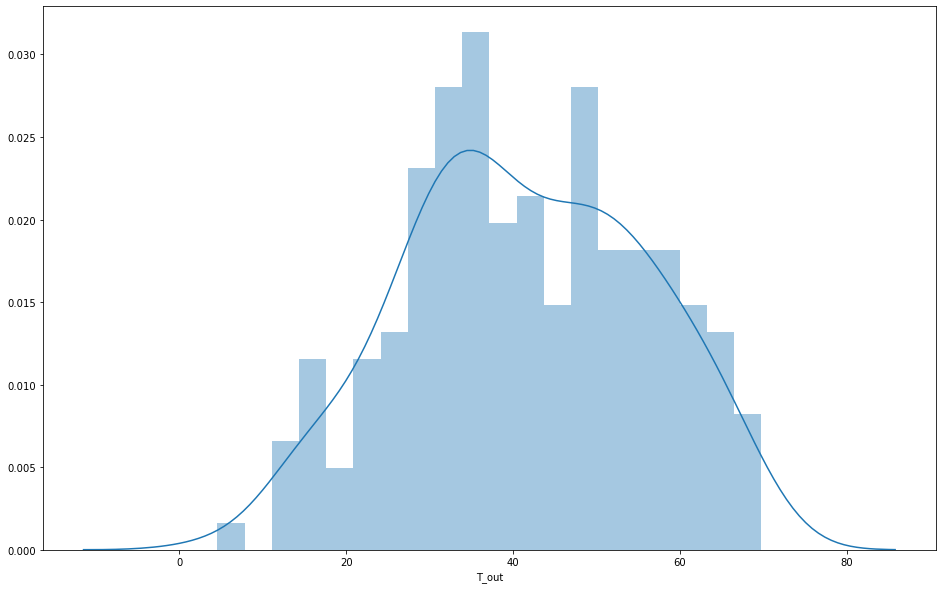

In [65]:
plt.figure(figsize = (16, 10))
sns.distplot(house_df_out['T_out'], bins = 20)

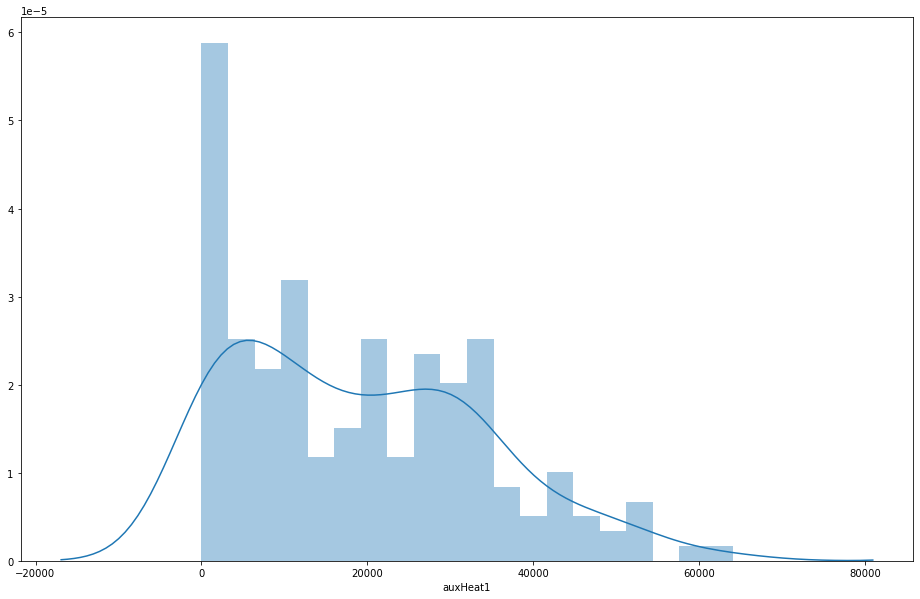

In [66]:
plt.figure(figsize = (16, 10))
sns.distplot(house_df_out['auxHeat1'], bins = 20)

In [67]:
house_df_out['T_ctrl - T_out'] = house_df_out.apply(f, axis = 1)

In [68]:
house_df_out.head()

,T_ctrl,T_stp_heat,T_out,RH_out,auxHeat1,T_ctrl - T_out
0,70.017361,70.000000,27.645833,74.979167,32280.0,42.371528
1,67.708333,65.979167,28.833333,78.930556,26250.0,38.875000
2,68.958333,68.416667,37.187500,72.631944,18975.0,31.770833
3,67.750000,67.253472,35.725694,81.993056,26415.0,32.024306
4,69.243056,67.333333,31.201389,63.871528,24435.0,38.041667


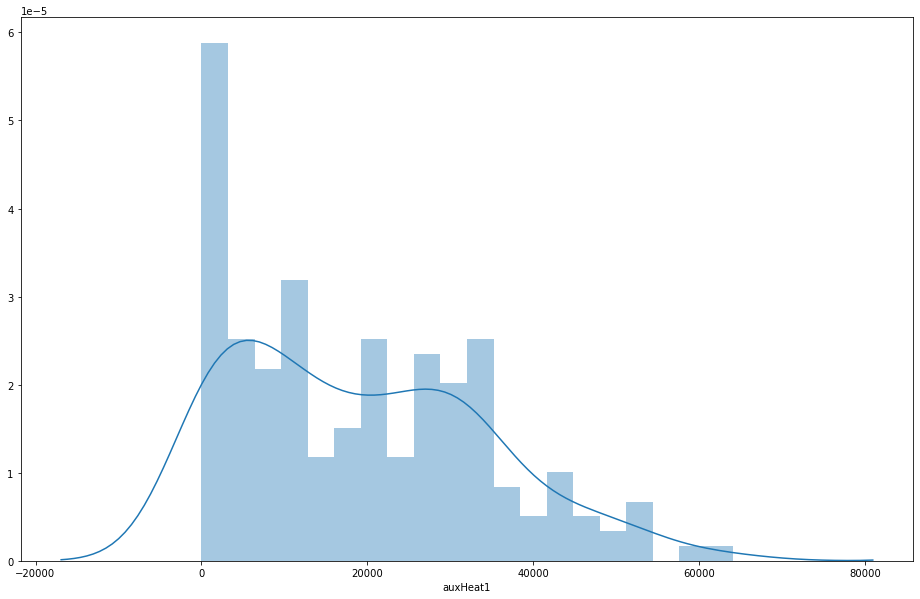

In [69]:
plt.figure(figsize = (16, 10))
sns.distplot(house_df_out['auxHeat1'], bins = 20)

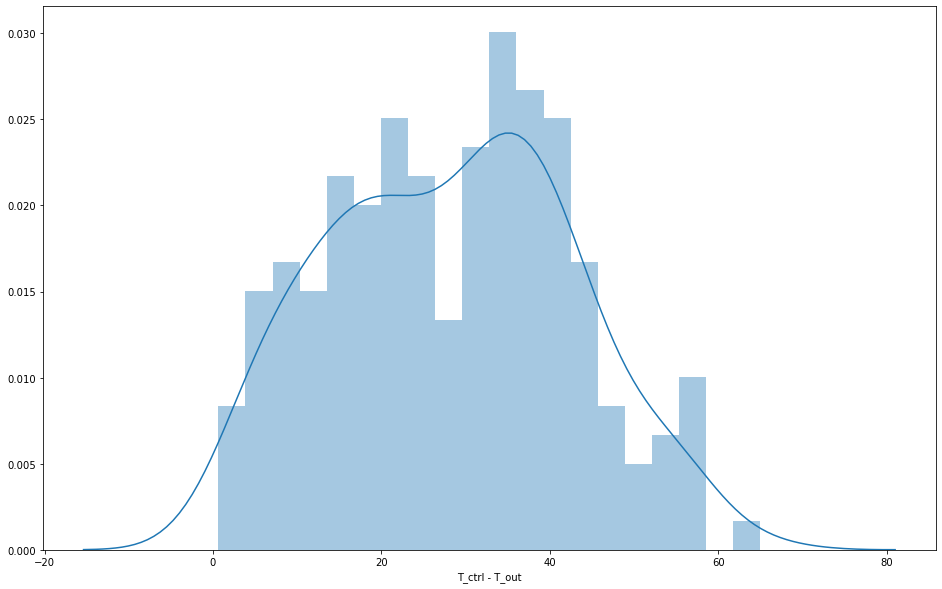

In [70]:
plt.figure(figsize = (16, 10))
sns.distplot(house_df_out['T_ctrl - T_out'], bins = 20)

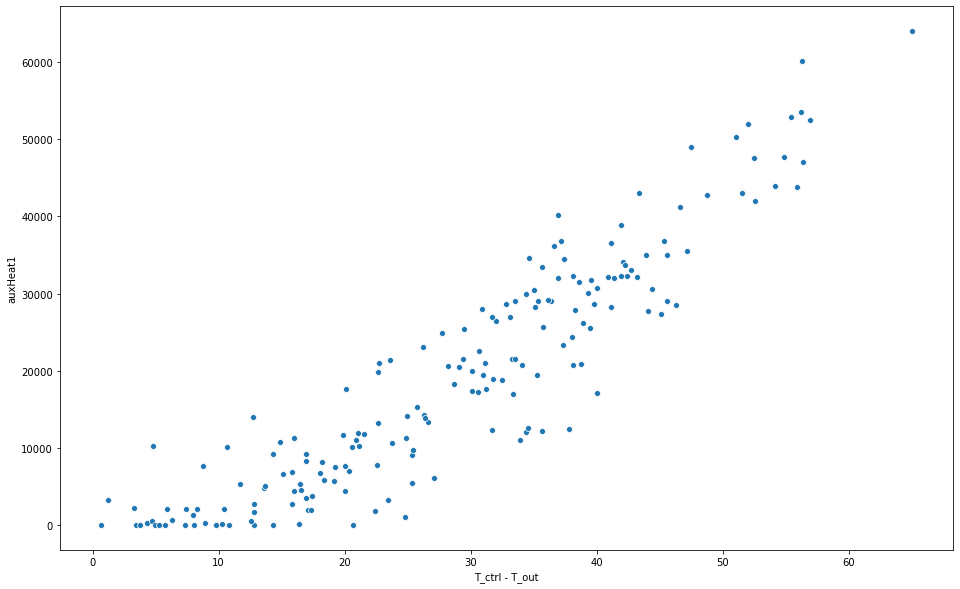

In [71]:
plt.figure(figsize = (16, 10))
sns.scatterplot(x = house_df_out['T_ctrl - T_out'], y = house_df_out['auxHeat1'])

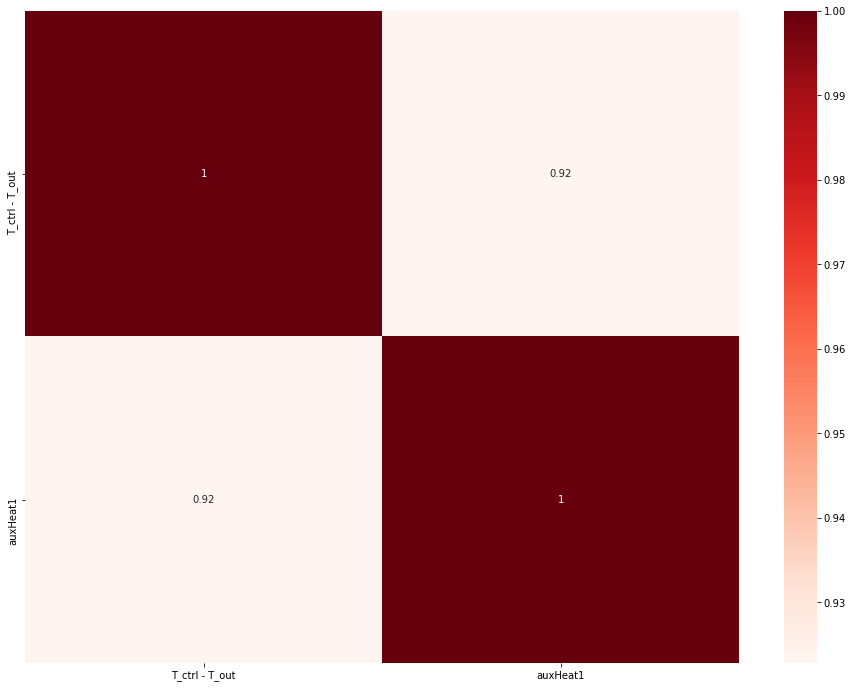

In [72]:
plt.figure(figsize = (16,12))
cor = house_df_out[['T_ctrl - T_out', 'auxHeat1']].corr('pearson')
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [73]:
house_df_out = house_df_out[house_df_out['auxHeat1'] != 0.0]

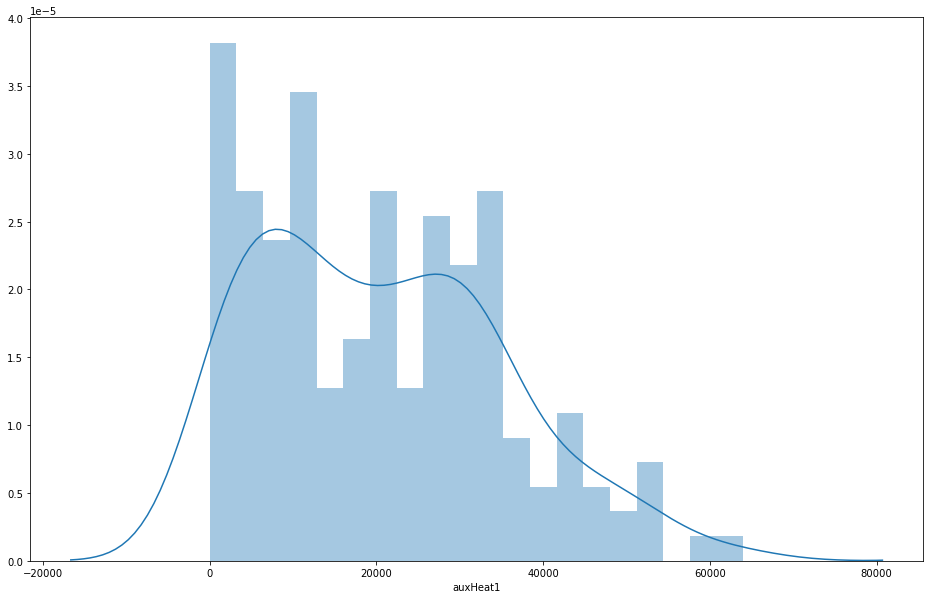

In [74]:
plt.figure(figsize = (16, 10))
sns.distplot(house_df_out['auxHeat1'], bins = 20)

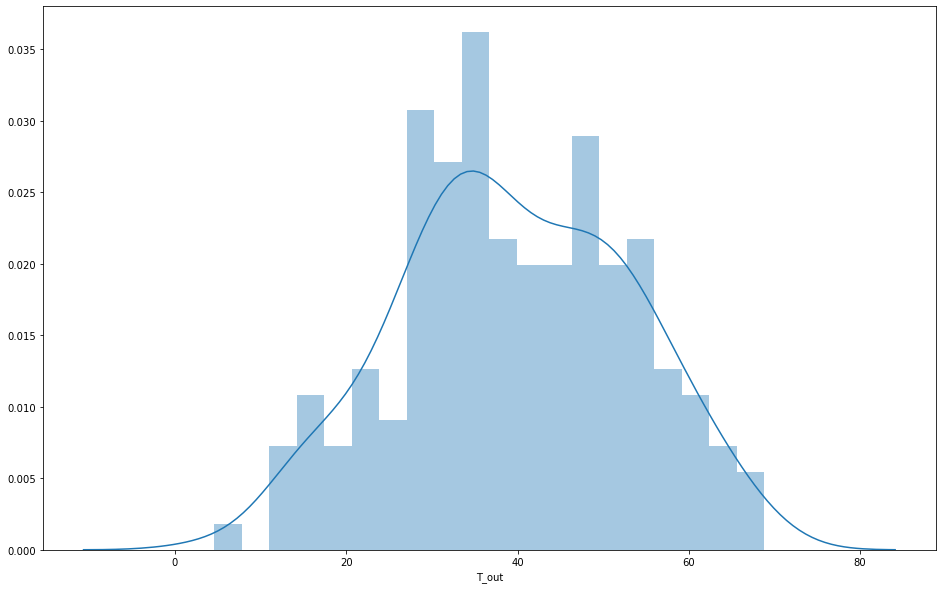

In [75]:
plt.figure(figsize = (16, 10))
sns.distplot(house_df_out['T_out'], bins = 20)

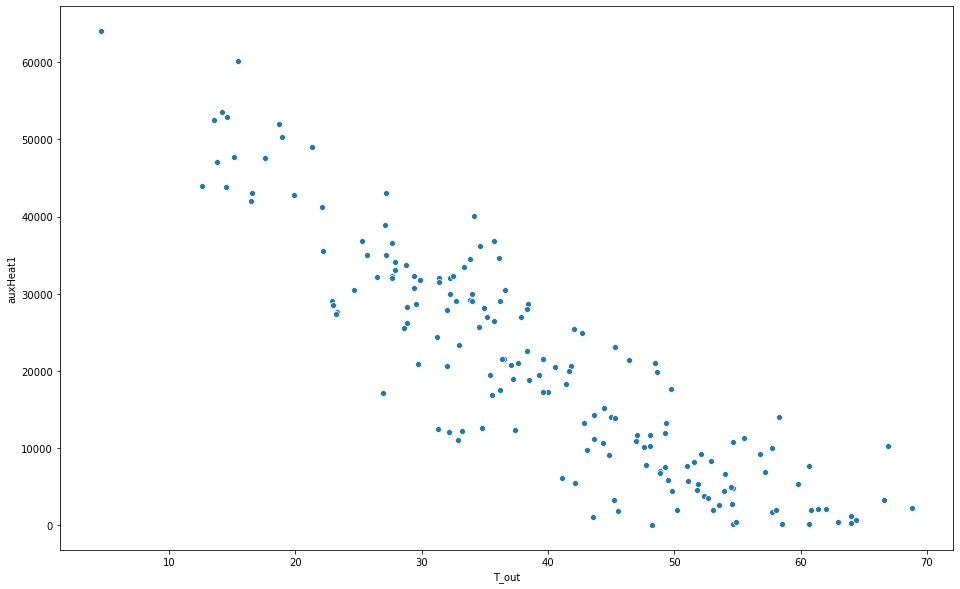

In [76]:
plt.figure(figsize = (16, 10))
sns.scatterplot(x = house_df_out['T_out'], y = house_df_out['auxHeat1'])

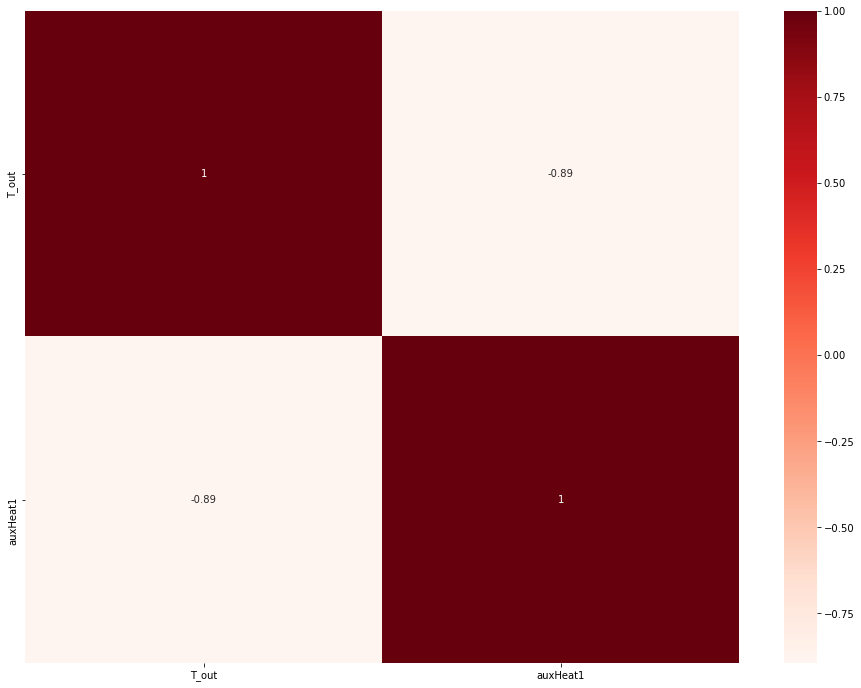

In [77]:
plt.figure(figsize = (16,12))
cor = house_df_out[['T_out', 'auxHeat1']].corr('pearson')
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

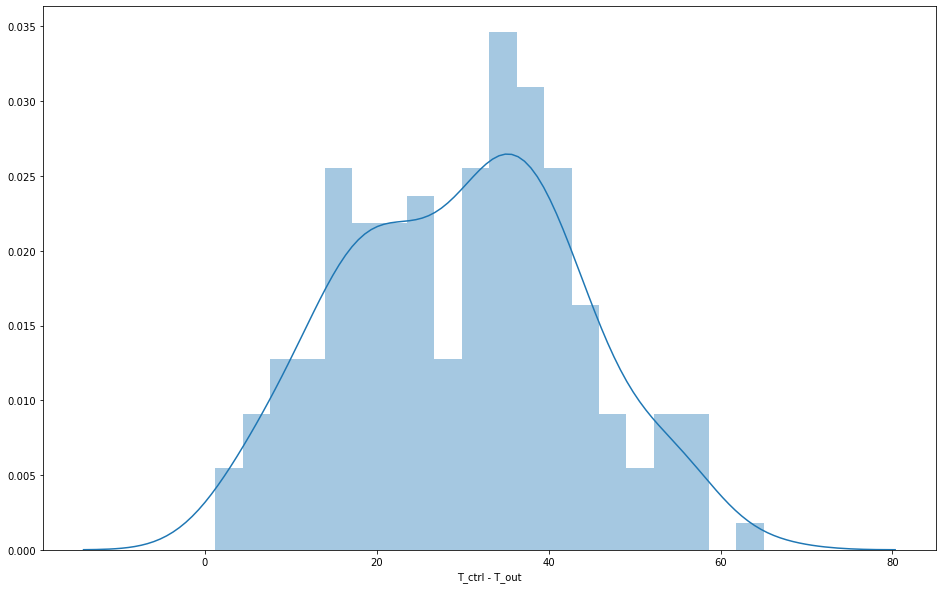

In [78]:
plt.figure(figsize = (16, 10))
sns.distplot(house_df_out['T_ctrl - T_out'], bins = 20)

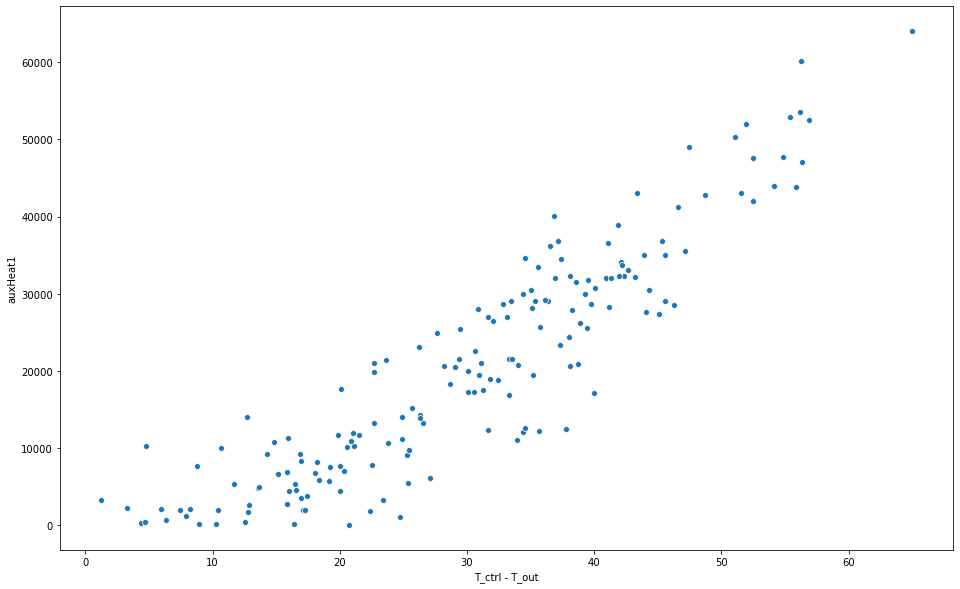

In [79]:
plt.figure(figsize = (16, 10))
sns.scatterplot(x = house_df_out['T_ctrl - T_out'], y = house_df_out['auxHeat1'])

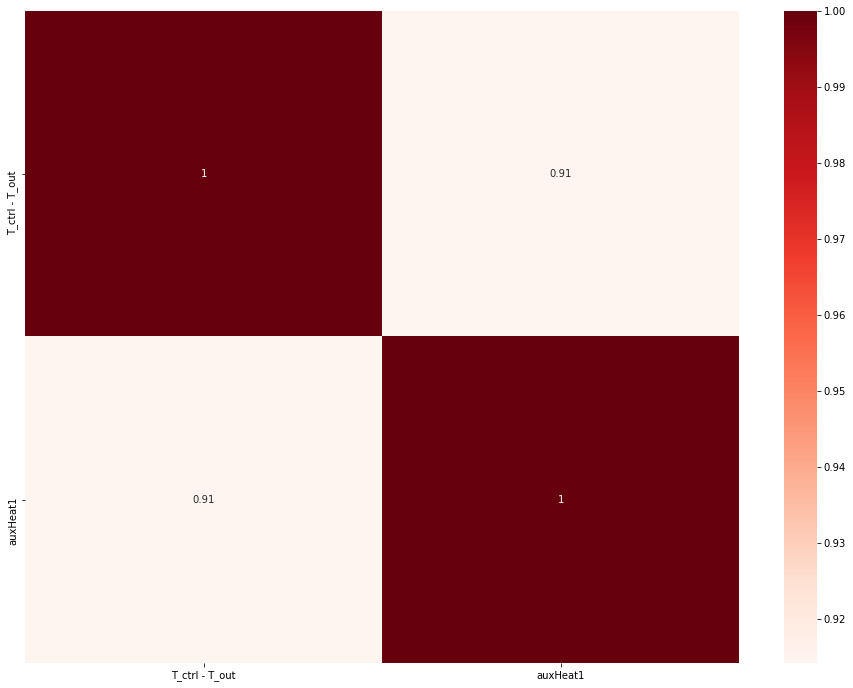

In [80]:
plt.figure(figsize = (16,12))
cor = house_df_out[['T_ctrl - T_out', 'auxHeat1']].corr('pearson')
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()